In [425]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import csv
import plotly.plotly as py

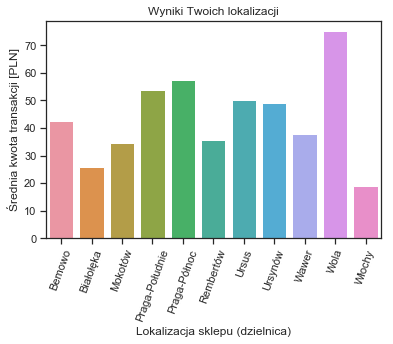

In [428]:
data = pd.read_csv('/Users/karolsputo/projects/pekao/datavis/final_table.csv')

data.drop(data[data.Code != 22].index, inplace=True)

data = data[['anon_MID', 'anon_Kwota', 'LocCity']].copy()
labels = data.LocCity
data = data.groupby('LocCity').mean()
data['tmp'] = ['Bemowo', 'Białołęka', 'Mokotów', 'Praga-Południe', 'Praga-Północ', 'Rembertów',
               'Ursus', 'Ursynów', 'Wawer', 'Wola', 'Włochy']
fig = sns.barplot(data=data, y=data.anon_Kwota, x=data.tmp)
plt.title('Wyniki Twoich lokalizacji')
plt.ylabel('Średnia kwota transakcji [PLN]')
plt.xlabel('Lokalizacja sklepu (dzielnica)')
fig.set(xticklabels=data.tmp)
plt.xticks(rotation=70)
plt.savefig('plot.pdf', format='pdf', bbox_inches='tight')
plt.show(fig)

                              anon_MID  anon_Kwota  TxnCzas TimeBracket
760   21421483dca238a3816b4c0f818a4547        20.0    85139           0
1705  21421483dca238a3816b4c0f818a4547        14.0    85212           0
1706  21421483dca238a3816b4c0f818a4547        12.0    90735           1
658   21421483dca238a3816b4c0f818a4547        22.0    91914           1
402   21421483dca238a3816b4c0f818a4547        13.0    92053           1
1688  21421483dca238a3816b4c0f818a4547        15.0    92808           1
691   21421483dca238a3816b4c0f818a4547        34.0    94904           1
1690  21421483dca238a3816b4c0f818a4547        27.0   100000           1
146   21421483dca238a3816b4c0f818a4547        30.0   100227           1
420   21421483dca238a3816b4c0f818a4547        26.0   101034           1
139   21421483dca238a3816b4c0f818a4547        31.0   102009           1
141   21421483dca238a3816b4c0f818a4547        17.0   102728           1
1682  21421483dca238a3816b4c0f818a4547        28.0   103521     

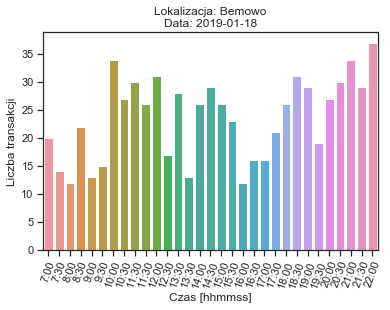

In [515]:
data = pd.read_csv('/Users/karolsputo/projects/pekao/datavis/final_table.csv')
data = data[['anon_MID', 'anon_Kwota', 'TxnCzas']].copy()
data.drop(data[data.anon_MID != '21421483dca238a3816b4c0f818a4547'].index, inplace=True)
data = data.sort_values(by=['TxnCzas'])
data.drop(data[data.anon_Kwota > 60].index, inplace=True)
data.drop(data[data.anon_Kwota < 10].index, inplace=True)
data.drop(data.head(7).index, inplace=True)
data.drop(data.tail(13).index, inplace=True)
data['TimeBracket'] = ['1' for i in range(len(data))]
groups = {'0':'7-9', '1':'9-11', '2':'11-13', '3':'13-15', '4':'15-17', '5':'17-19', '6':'19-21', '7':'21-23'}

for index, row in data.iterrows():
    tmp = int(row['TxnCzas'])
    tmp2 = int(row['anon_Kwota'])
    data.at[index, 'anon_Kwota'] = int(tmp2)
    if tmp > 70000 and  tmp < 90000:
        data.at[index,'TimeBracket'] = '0'
    if tmp > 90000 and  tmp < 110000:
        data.at[index,'TimeBracket'] = '1'
    if tmp > 110000 and  tmp < 130000:
        data.at[index,'TimeBracket'] = '2'
    if tmp > 130000 and  tmp < 150000:
        data.at[index,'TimeBracket'] = '3'
    if tmp > 150000 and  tmp < 170000:
        data.at[index,'TimeBracket'] = '4'
    if tmp > 170000 and  tmp < 190000:
        data.at[index,'TimeBracket'] = '5'
    if tmp > 190000 and  tmp < 210000:
        data.at[index,'TimeBracket'] = '6'
    if tmp > 210000 and  tmp < 230000:
        data.at[index,'TimeBracket'] = '7'

print(data)
labels = [
    '7:00', '7:30', '8:00', '8:30', '9:00', '9:30', '10:00', '10:30', '11:30', '11:30', '12:00', '12:30', '13:30',
    '13:30','14:00', '14:30', '15:00', '15:30', '16:00', '16:30', '17:00', '17:30', '18:00', '18:30', '19:00',
    '19:30', '20:00', '20:30', '21:00', '21:30', '22:00'
]

fig = sns.barplot(data=data, y=data.anon_Kwota, x=data.TxnCzas)
plt.title('Lokalizacja: Bemowo\nData: 2019-01-18')
plt.ylabel('Liczba transakcji')
plt.xlabel('Czas [hhmmss]')
fig.set(xticklabels=labels)
plt.xticks(rotation=70)
# plt.savefig('plot2.pdf', format='pdf', bbox_inches='tight')
plt.show(fig)